In [1]:
import numpy as np

Testing code using randomly generated matrices

In [2]:
import PCA_implementations as algorithms
import PCA_metrics as metrics
from PCA_implementations import reconstruct_PCA, k_dim_PCA, gaussian, laplace, wishart

A = np.random.rand(20, 30)

In [3]:
k = 20
PCA_A = algorithms.k_dim_PCA(np.matmul(np.transpose(A), A), 10)

#TODO: create a random matrix that's sparse


In [4]:
insurance = np.loadtxt("data/ticdata2000.txt") #https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/
o_ring = np.loadtxt("data/o-ring-erosion-only.data") #https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring
vowels = np.loadtxt("data/ae.test")# https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels

In [5]:
epsilon_range = [0.01, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5]
delta_range = [0.001, 0.01, 0.1, 0.5, 1]
data_vars = {"random":A, "o-ring":o_ring, "ae":vowels, "insurance":insurance}
algs = {"gaussian": gaussian, "laplace": laplace, "wishart": wishart }


In [6]:

results_by_data = {}

for name in data_vars:
    data = data_vars[name]
    PCA_approx = reconstruct_PCA(data, k_dim_PCA(data, k))
    results = {}
    for epsilon in epsilon_range:
        results[epsilon] = {}
        for delta in delta_range:
            results[epsilon][delta] = {}
            for alg in algs:
                PCA_alg_approx = algs[alg](data, epsilon, delta, k)
                results[epsilon][delta][alg] = metrics.subspace_dist(PCA_approx, PCA_alg_approx)
    results_by_data[name] = results

Plots
Plotting results for random data


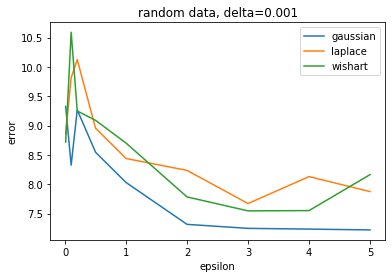

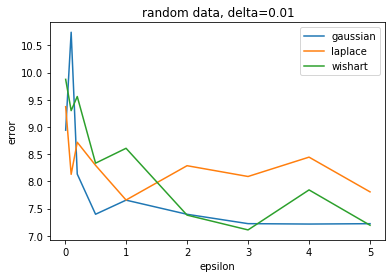

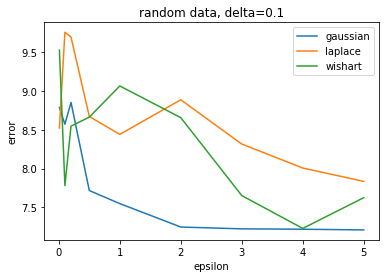

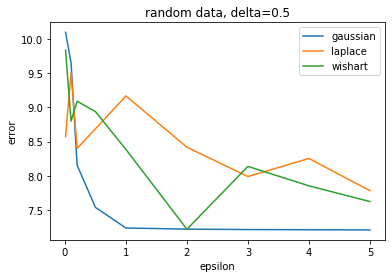

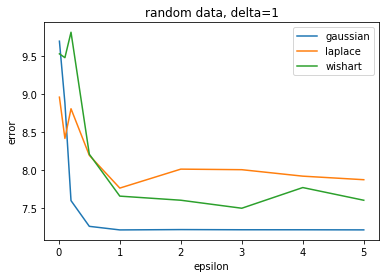

Plotting results for o-ring data


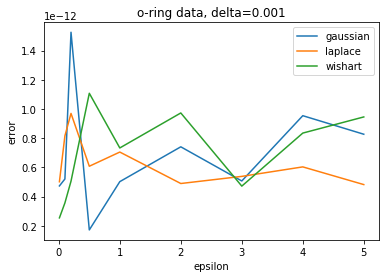

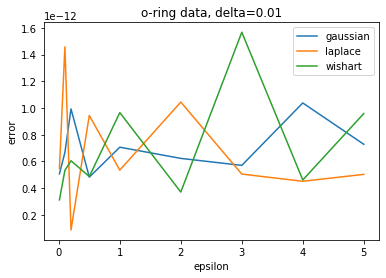

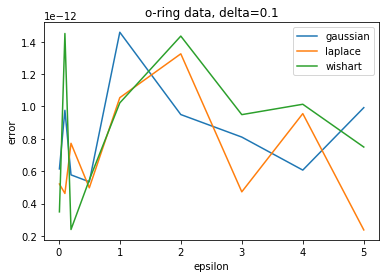

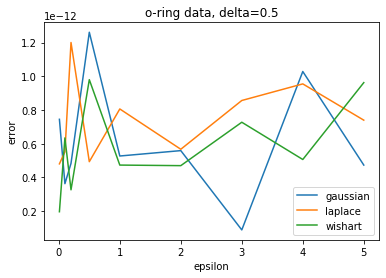

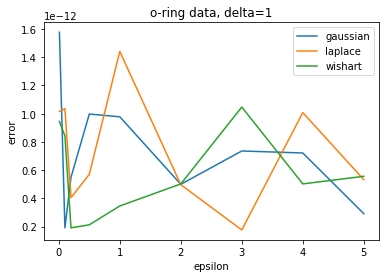

Plotting results for ae data


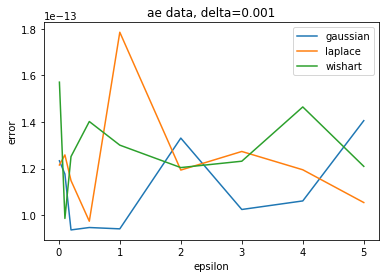

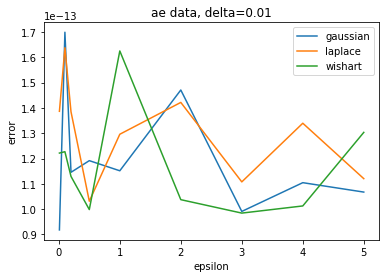

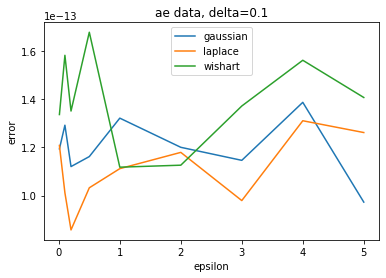

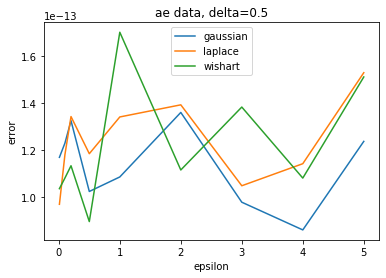

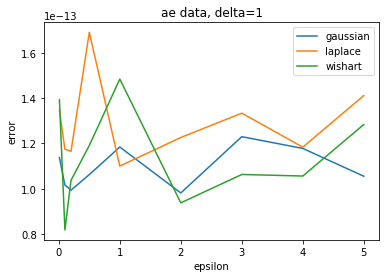

Plotting results for insurance data


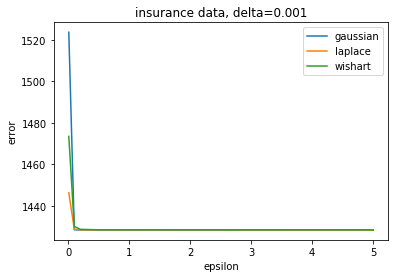

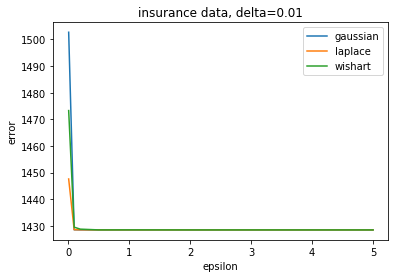

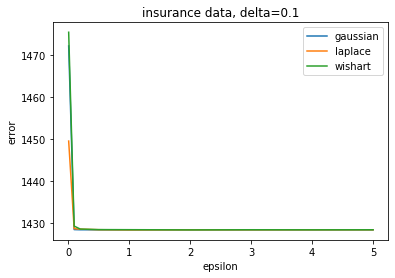

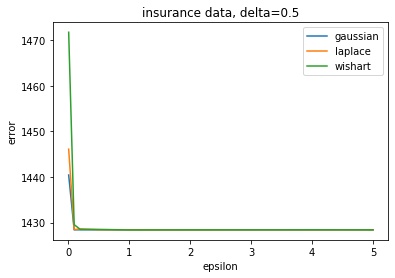

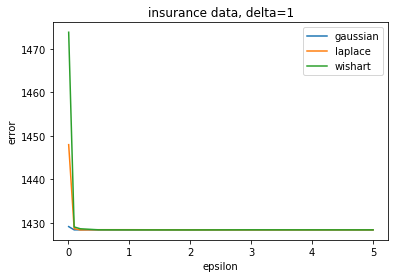

In [7]:
import matplotlib.pyplot as plt

print ("Plots")

for name in data_vars:
    print ("Plotting results for {} data".format(name))
    results = results_by_data[name]
    for delta in delta_range:
        for alg in algs:
            plt.plot(epsilon_range,[results[epsilon][delta][alg] for epsilon in epsilon_range], label=alg)
        plt.title('{} data, delta={}'.format(name, delta))
        plt.xlabel('epsilon')
        plt.ylabel('error')
        plt.legend()
        plt.show()


In [8]:
import cv2
import sklearn

In [9]:
im = cv2.imread("data/monarch.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2.imwrite("output/monarch_original.jpg", im)

True

In [10]:
Xhat = algorithms.reconstruct_PCA(im, algorithms.k_dim_PCA(im, 100))
Xhat = cv2.normalize(Xhat, Xhat, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("output/monarch_PCA_100.jpg", Xhat)

True

In [11]:
Xhat_approx = gaussian(im, 1, 0.2, 100)
Xhat_approx = cv2.normalize(Xhat_approx, Xhat_approx, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("output/monarch_gaussian_100.jpg", Xhat_approx)

True

In [12]:
Xhat_wishart = wishart(im, 1, 0, 100)
Xhat_wishart = cv2.normalize(Xhat_wishart, Xhat_wishart, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("output/monarch_Wishart_100.jpg", Xhat_wishart)

True

In [ ]:



cv2.imshow("regular", im)
cv2.waitKey(0)
cv2.imshow("pca image", Xhat)
cv2.waitKey(0)
cv2.imshow("pca image perturbed by gaussian", Xhat_approx)
cv2.waitKey(0)
cv2.imshow("pca image perturbed by wishart", Xhat_wishart)
cv2.waitKey(0)
cv2.destroyAllWindows()